In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_user = pd.read_table('zee-users.dat', sep='::',engine='python') 

In [3]:
df_rating = pd.read_table('zee-ratings.dat', sep='::',engine='python') 

In [4]:
df_movies = pd.read_table('zee-movies.dat', sep='::', encoding='latin1',engine='python')

In [5]:
df_movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_rating.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


# EDA for Users

In [7]:
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
def user_occupation_preprocessing(val):
    if(val==20):
        return "writer"
    if(val==19):
        "Unemployed"
    if(val==18):
        return "tradesman/craftsman"
    if(val==17):
        return "technician/engineer"
    if(val==16):
        return "self-employed"
    if(val==15):
        return "scientist"
    if(val==14):
        return "sales/marketing"
    if(val==13):
        return "retired"
    if(val==14):
        return "sales/marketing"
    if(val==13):
        return "retired"
    if(val==12):
        return "programmer"
    if(val==11):
        return "lawyer"
    if(val==10):
        return "K-12 student"
    if(val==9):
        return "homemaker"
    if(val==8):
        return "farmer"
    if(val==7):
        return "executive/managerial"
    if(val==6):
        return "doctor/health care"
    if(val==5):
        return "customer service"
    if(val==4):
        return "college/grad student"
    if(val==3):
        return "clerical/admin"
    if(val==2):
        return "artist"
    if(val==1):
        return "academic/educator"
    if(val==0):
        return "other/not specified"

def user_age_preprocessing(val):
    if(val==1):
        return "Under 18"
    if(val==18):
        return "18-24"
    if(val==25):
        return "25-34"
    if(val==35):
        return "35-44"
    if(val==50):
        return "50-55"
    if(val==56):
        return "56+";

# Univariate Analysis of Gender

In [9]:
df_user['Age'] = df_user['Age'].apply(user_age_preprocessing)
df_user['Occupation'] = df_user['Occupation'].apply(user_occupation_preprocessing)

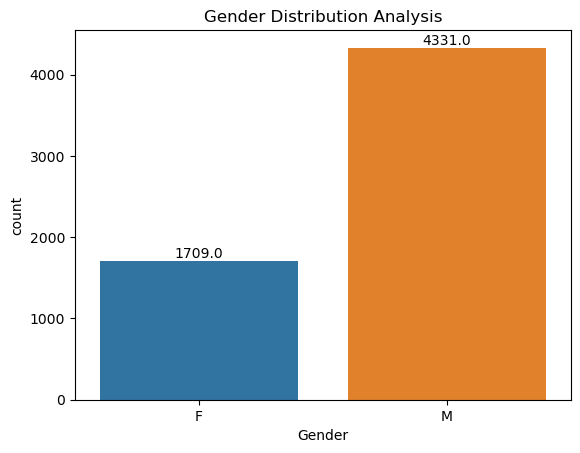

In [10]:
plt.title('Gender Distribution Analysis')
ax = sns.countplot(data=df_user,x='Gender')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# Observation 
Male Users are more as compare to Female User

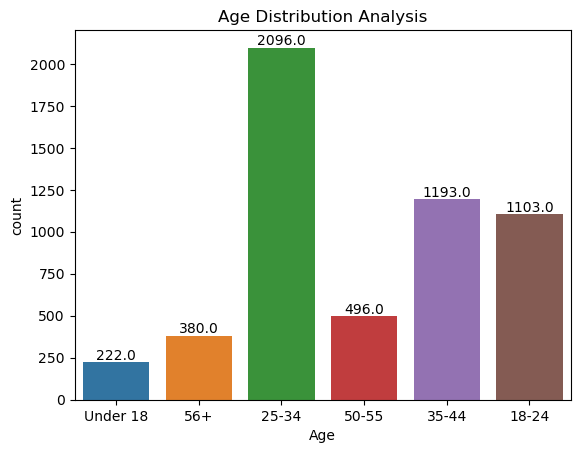

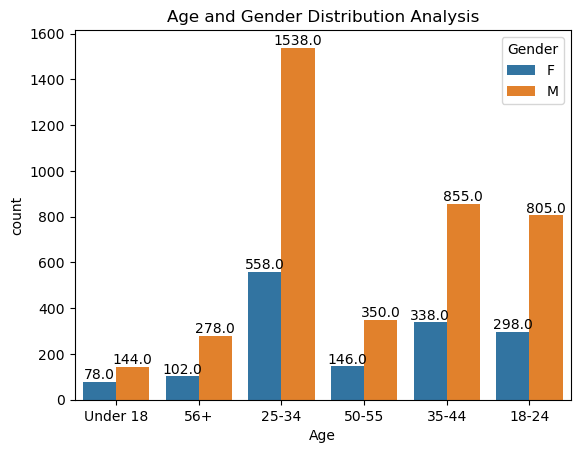

In [11]:
ax = sns.countplot(data=df_user,x='Age')
plt.title('Age Distribution Analysis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = sns.countplot(data=df_user,x='Age',hue='Gender')
plt.title('Age and Gender Distribution Analysis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
plt.show()

# Observation 
1. It is observed that users of age between 25 to 34 are highly active.
2. It is observed that Male users of age between 25 to 34 are highly active.
3. It is observed that user with age group of 56+ is less.

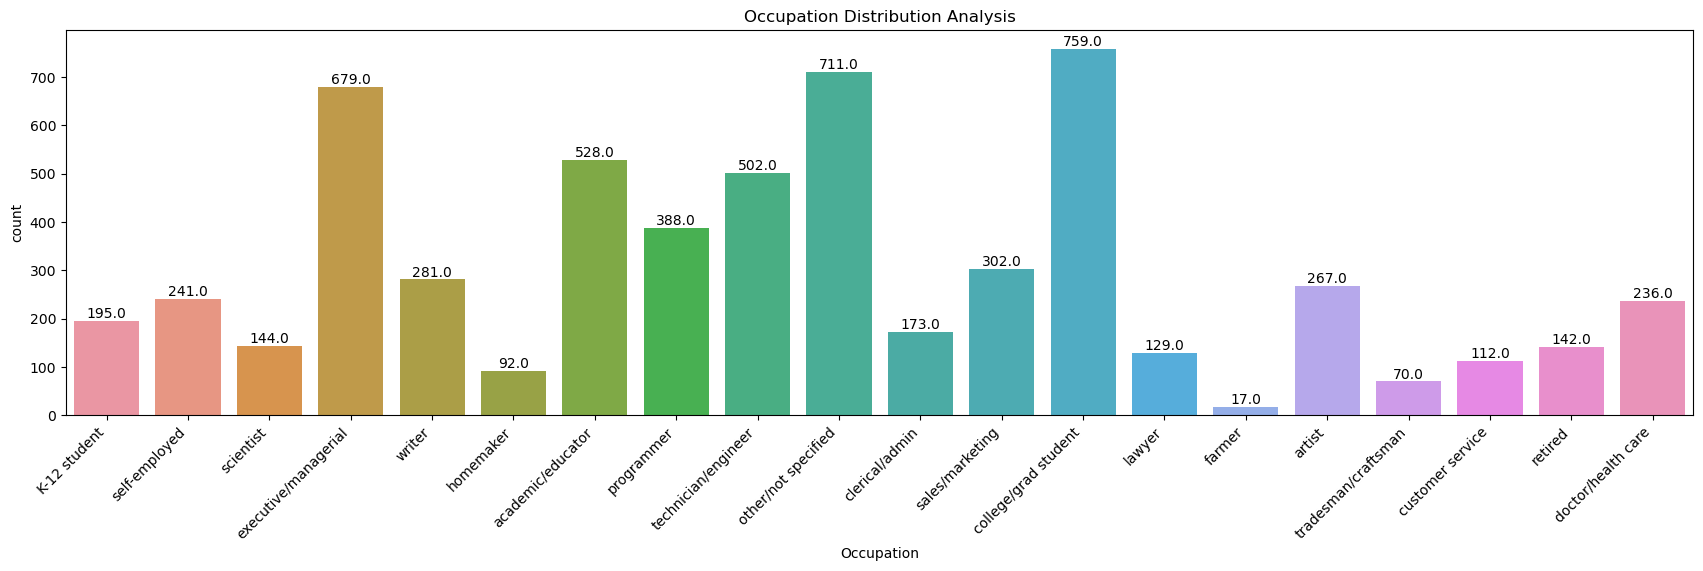

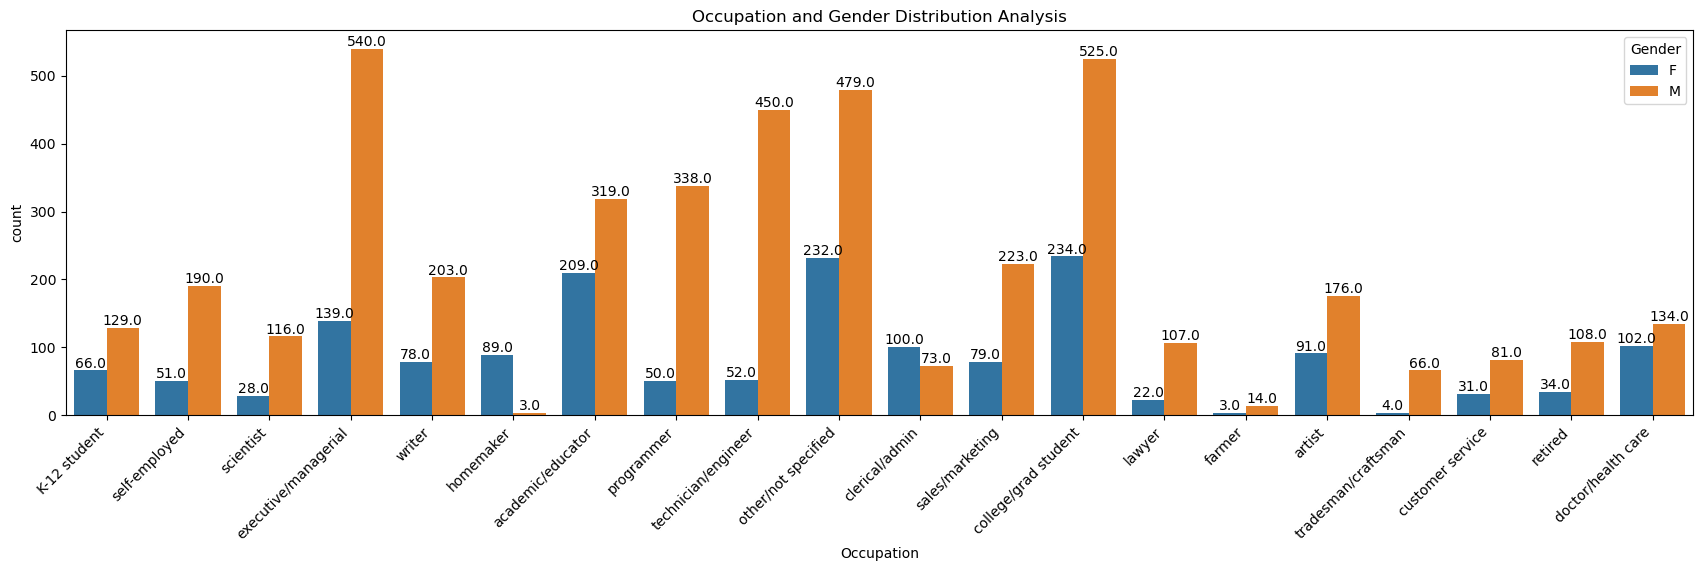

In [12]:
plt.figure(figsize=(21, 5))
ax = sns.countplot(data=df_user, x='Occupation')

plt.title('Occupation Distribution Analysis')

# Rotate x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


plt.figure(figsize=(21, 5))
ax = sns.countplot(data=df_user, x='Occupation',hue='Gender')

plt.title('Occupation and Gender Distribution Analysis')

# Rotate x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()



# Observation
1. Homemaker users are less as compare to other occupation users.
2. Every occupation category male users are high except homemaker's.

# EDA For Movie data

In [13]:
df_movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
len(set(df_movies['Movie ID']))

3883

In [15]:
len(set(df_rating['MovieID']))

3706

In [16]:
df_rating.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [17]:
rating_and_movies  = pd.merge(df_rating,df_movies,how='inner',left_on='MovieID',right_on='Movie ID')

In [18]:
rating_and_movies.drop('Movie ID',axis=1,inplace=True)

In [19]:
rating_and_movies.shape

(1000209, 6)

In [20]:
rating_and_movies.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [21]:
genre_user_top_20 = rating_and_movies[['Genres','UserID']].groupby(['Genres']).nunique().sort_values('UserID',ascending=False).reset_index()[:20]

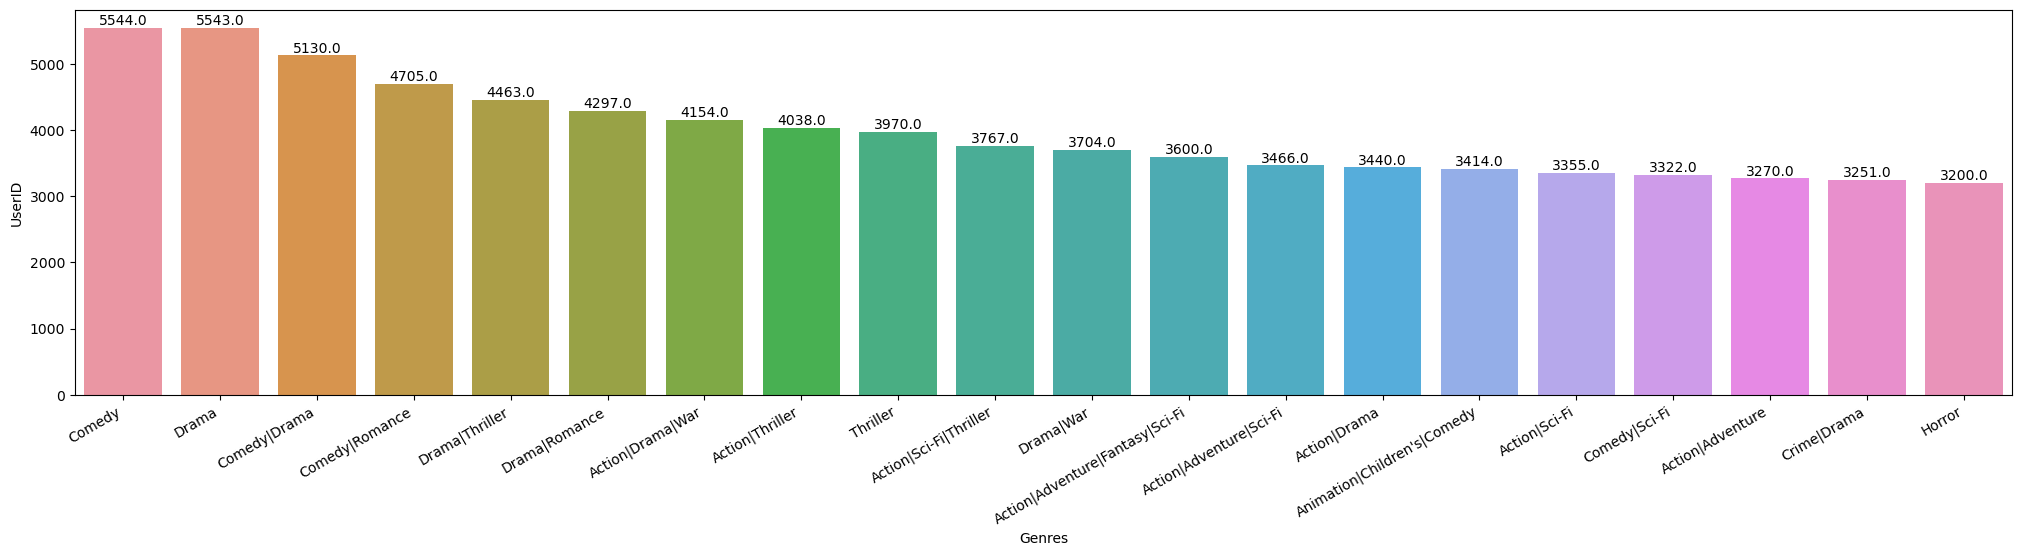

In [22]:
plt.figure(figsize=(25,5))
ax = sns.barplot(data=genre_user_top_20,x='Genres',y='UserID')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Observation
1. User Prefer more Movies with comedy genre or amalgamation with comedy genre.
2. Users prefer less movies with action or voilent genre.

In [23]:
user_ratings = rating_and_movies[['UserID','Rating']].groupby(['UserID']).mean(['Rating']).reset_index()

In [24]:
print(f'Max ratings: {user_ratings["Rating"].max()}, Min ratings: {user_ratings["Rating"].min()}')

Max ratings: 4.962962962962963, Min ratings: 1.0153846153846153


In [25]:
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,None,executive/managerial,02460
4,5,M,25-34,writer,55455


In [26]:
df = pd.merge(rating_and_movies,df_user,how='inner',left_on='UserID',right_on='UserID')

In [27]:
df.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,Under 18,K-12 student,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,Under 18,K-12 student,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,Under 18,K-12 student,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,Under 18,K-12 student,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,Under 18,K-12 student,48067


In [28]:
df.shape

(1000209, 10)

In [29]:
gender_distribution = df.groupby(['Genres', 'Gender']).size().unstack(fill_value=0)

In [30]:
#pd.set_option('display.max_rows', None)
gender_distribution

Gender,F,M
Genres,,
Action,1611,10700
Action|Adventure,1978,8468
Action|Adventure|Animation,64,281
Action|Adventure|Animation|Children's|Fantasy,41,94
Action|Adventure|Animation|Horror|Sci-Fi,71,547
...,...,...
Sci-Fi|Thriller|War,40,240
Sci-Fi|War,231,1136
Thriller,4312,13539


In [31]:
female_genre_interest = gender_distribution['F'].sort_values(ascending=False)[:5]
male_genre_interest = gender_distribution['M'].sort_values(ascending=False)[:5]

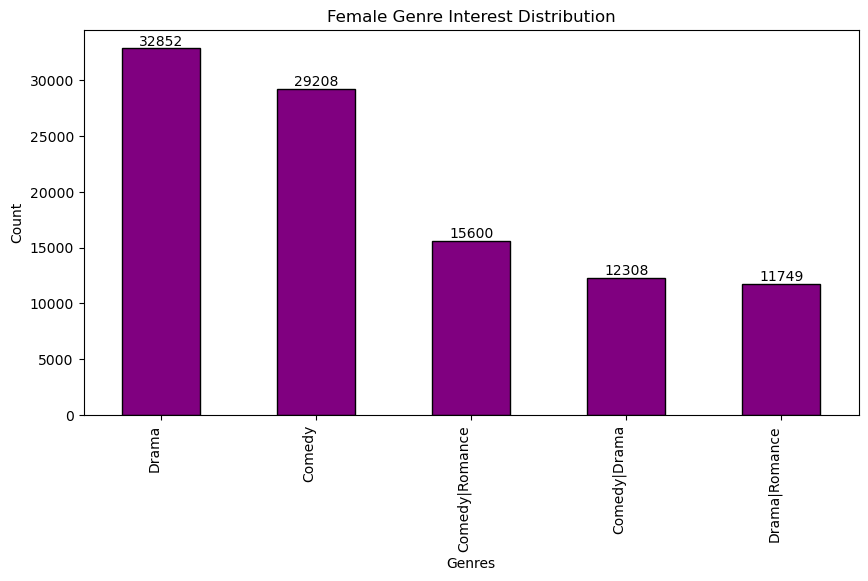

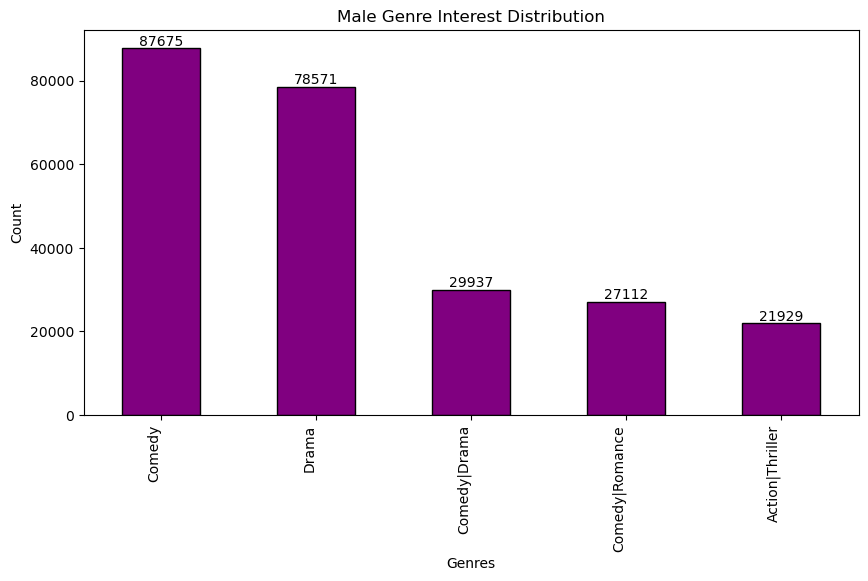

In [32]:
plt.figure(figsize=(10, 5))
ax = female_genre_interest.plot(kind='bar', color='purple', edgecolor='black')

ax.set_title('Female Genre Interest Distribution')
ax.set_xlabel('Genres')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


plt.figure(figsize=(10, 5))
ax = male_genre_interest.plot(kind='bar', color='purple', edgecolor='black')

ax.set_title('Male Genre Interest Distribution')
ax.set_xlabel('Genres')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


# Observation 
1. Female Population prefer Drama genre more as compare to other genres.
2. Male Population prefer Comedy genre more as compare to other genres.